In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore')


In [2]:
# loading data
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

### **Data Cleaning**

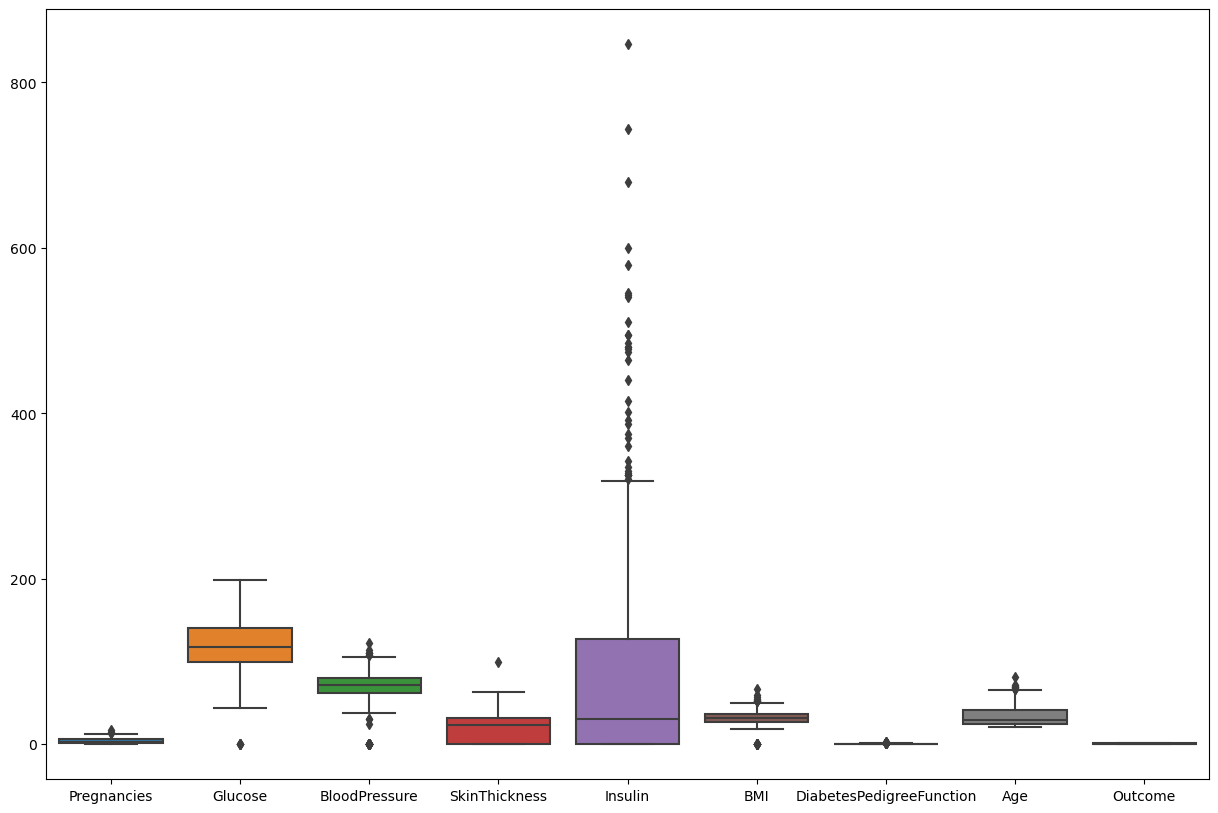

In [3]:
# create box plots for data to visualize outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.show()

In [4]:
# Calculate the IQR for each numerical column
def detect_outliers_iqr(df):
    outliers_dict = {}
    for col in df.select_dtypes(include=['float64', 'int']).columns:  #select the numerical columns to iterate over
        Q1 = df[col].quantile(0.25)  #calculate the first quaartile
        Q3 = df[col].quantile(0.75)  # calculate the third quartile
        IQR = Q3 - Q1  #calculate the interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # define the outliers 
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_dict[col] = outliers
    return outliers_dict

outliers_dict = detect_outliers_iqr(df)

# quantifying the outliers

total_outliers = sum(len(outliers) for outliers in outliers_dict.values())
total_data_points = len(df)
percentage_outliers = (total_outliers / total_data_points) * 100

print(f'Percentage of outliers: {percentage_outliers:.2f}%')

Percentage of outliers: 19.01%


In [5]:
# removing outliers

def remove_outliers(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers(df)
df_cleaned.shape

(636, 9)